In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import tabulate as tb

# Ex 2

In [3]:
def Derivada(x, funcao, dist):
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist)

    return resC

def MetodoDeNewton(x0, tol, max_it, r):
    k = 0
    err = 100
    x = x0
    while err > tol and k < max_it:
        delta = -r(x)/Derivada(x, r, 1e-3)
        err = abs(delta)/abs(x)
        x = x + delta
        k += 1

    return x, k

In [4]:
def func(x):
    return np.cos(x) - x

def DerivadaFunc(x):
    return -np.sin(x) - 1

x0 = 1
tol = 1e-6
max_it = 1e6

res1, k = MetodoDeNewton(x0, tol, max_it, func)
res2 = scipy.optimize.fsolve(func, x0, fprime = DerivadaFunc)

print(k, res1, res2, abs(res1-res2))

4 0.7390851332151606 [0.73908513] [1.11022302e-16]


# Ex 3

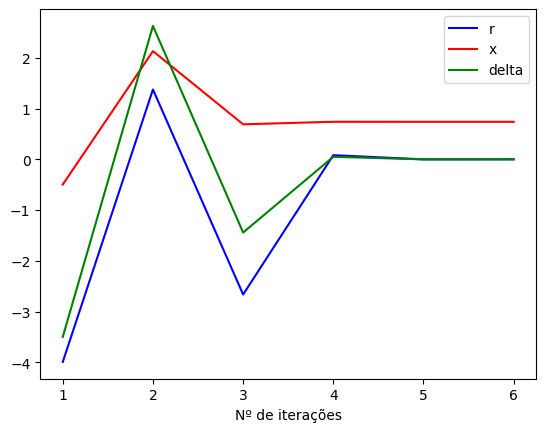

In [29]:
def PlotMetodoDeNewton(x0, tol, max_it, r):
    k = 0
    err = 100
    x = x0
    R = []
    X = []
    K = []
    Delta = []
    while err > tol and k < max_it:
        delta = -r(x)/Derivada(x, r, 1e-3)
        
        R.append(r(x))
        
        err = abs(delta)/abs(x)
        x = x + delta
        k += 1

        X.append(x)
        K.append(k)
        Delta.append(delta)

    plt.plot(K, R, "-b", label="r")
    plt.plot(K, X, "-r", label="x")
    plt.plot(K, Delta, "-g", label="delta")
    plt.xlabel("Nº de iterações")
    plt.legend()
    plt.show()

    return x, k

x0 = 3
tol = 1e-6
max_it = 1e6

res1, k = PlotMetodoDeNewton(x0, tol, max_it, func)

# Ex 4

In [6]:
def Assembly(conec, C):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    #Soma-se 1 porque, se o maior nó é o 72, então ele precisa de 73 espaços (pois o primeiro é o 0)
    nv = max([max(conec[:,0]), max(conec[:,1])]) + 1
    #Quantidade de canos = número de ligações = tamanho da lista de Condutâncias
    nc = len(C)
    A = np.zeros(shape=(nv,nv))
    #Para cada cano
    for k in range(nc):
        #Pega os nós conectados
        n1 = conec[k, 0]
        n2 = conec[k, 1]

        #Salva na matriz A os valores da condutância do cano de acordo com os nós respectivos
        A[n1, n1] += C[k]
        A[n1, n2] += -C[k]
        A[n2, n1] += -C[k]
        A[n2, n2] += C[k]

    return A

#Para calcular as pressões de cada nó e vazões de cada cano
def SolveNetwork(conec, C, natm, nB, QB, imprimir):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    nv = max([max(conec[:,0]), max(conec[:,1])]) + 1

    #Pega a matriz A
    Atilde = Assembly(conec, C)
    #Altera a linha do nó de saída da massa
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1

    #Cria a matriz de variação da massa
    b = np.zeros(shape=nv)
    #Salva em qual nó está entrando massa externa
    b[nB] = QB

    #Resolve a matriz, assumindo Ã como dados, b como resultados e calculando o vetor de pressões intermediário
    pressure = np.linalg.solve(Atilde, b)

    #Para não desacelerar desnecessariamente o último exercício
    if imprimir:
        print("Ã = ", Atilde, "\n\nb = ", b, "\n\nPressão = ", pressure)
    return pressure

def CalcularPotencia(p, D, K):
    pT = np.transpose(p)
    Dt = np.transpose(D)
    aux = Dt.dot(K).dot(D)
    W = pT.dot(aux).dot(p)
    return W

def GeraRede(nx,ny, CH, CV):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
        for j in range(ny):
            ig = i + j*nx
            coord[ig,0] = i
            coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
            k = j*(nx-1) + i
            conec[k,0] = j*nx + i
            conec[k,1] = j*nx + i+1
            C[k] = CH
            

    # Loop sobre canos verticais
    for i in range(nx):
        for j in range(ny-1):
            k = (nx-1)*ny + j*nx + i
            conec[k,0] = i + j*nx
            conec[k,1] = i + (j+1)*nx
            C[k] = CV

    return nv, nc, conec, C, coord

def PlotPressure(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()

def PlotPressureAsSurface(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, cmap='jet', edgecolor=None)
    ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
    ax.view_init(elev=30., azim=45)
    plt.show()

def FormarK(C):
    nc = len(C)
    K = np.zeros(shape=(nc,nc))
    #Salva o valor de cada condutância de acordo com o cano relacionado
    for k in range(nc):
        K[k, k] = C[k]

    return K

#Calcular a matrix de fluxo
def FormarD(conec, C):
    #Procura o maior valor entre o maior valor de cada coluna, assim encontrando o tamanho
    nv = max([max(conec[:,0]), max(conec[:,1])]) + 1
    nc = len(C)

    #Como a matriz define quais nós são a entrada e saída de cada cano,
    #ela possui uma linha pra cada cano, uma coluna pra cada nó
    D = np.zeros(shape=(nc,nv))
    for k in range(nc):
        #Pega os nós do cano
        n1 = conec[k, 0]
        n2 = conec[k, 1]

        D[k,n1] = 1
        D[k,n2] = -1

    return D

In [7]:
def Potencia(x):
    n, m = 9, 8
    QB = 3
    nAtm = n*m - 1
    nB = 0
    
    CH = 2.3 + 10*pow(math.e, -pow(x - 5, 2))
    CV = 1.8 + 10*pow(math.e, -pow(x - 5, 2))
    
    nv, nc, conec, C, coord = GeraRede(n, m, CH, CV)
    
    p = SolveNetwork(conec, C, nAtm, nB, QB, False)
    
    K = FormarK(C)
    D = FormarD(conec, C)
    
    pT = np.transpose(p)
    Dt = np.transpose(D)
    aux = Dt.dot(K).dot(D)
    W = pT.dot(aux).dot(p)
        
    return W

def ShowPotencia(res1, res2):
    div = np.linspace(1, 10, 100)
    aux = []
    for x in div:
        aux.append(Potencia(x))

    #Plot da potência
    plt.plot(div, aux, "-m")

    #Plot dos resultados
    plt.plot([res1] * 2, [min(aux), max(aux)], ":r")
    plt.plot([res2] * 2, [min(aux), max(aux)], ":b")
    plt.plot([min(div), max(div)], [12] * 2, ":g")
    
    plt.title("Potencia")
    plt.show()

7 2.7578395410058985 11.999999999999844
8 7.242160458994207 12.000000000000092


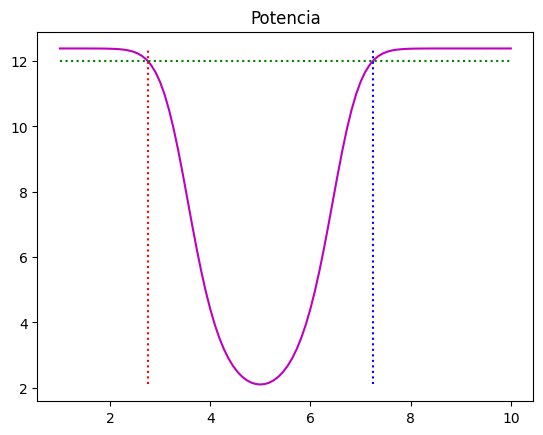

In [8]:
def func2(x):
    return Potencia(x) - 12

tol = 1e-14
max_it = 1e4

#Número ideal, os próximos dele não conseguem realizar
x0 = 4
res1, k1 = MetodoDeNewton(x0, tol, max_it, func2)

#Número ideal, o único outro próximo que consegue fazer é o 7, mas leva uma quantidade enorme de tentativas (>10000)
x0 = 6
res2, k2 = MetodoDeNewton(x0, tol, max_it, func2)

print(k1, res1, Potencia(res1))
print(k2, res2, Potencia(res2))

ShowPotencia(res1, res2)